<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/18)_%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_%EC%A7%80%ED%91%9C_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이커머스 데이터 활용 지표 개발
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 서비스 이용형태 탐색  
2) 지표기획 및 데이터 추출  
3) RFM 활용 서비스 이용 수준 측정

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter18')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter18' ← 변경X
# os.getcwd()

Mounted at /content/drive


## 문제상황 및 데이터 살펴보기  
---
>**시나리오**

```
A사는 오픈마켓 플랫폼을 운영 중이다. 런칭 이후 사용자들이 빠르게 상승하였지만, 현재는 정체기에 빠져있다. 현재 서비스 이용 수준이  
어떻게 되고 있으며 런칭 이후 어떻게 변해왔는지를 파악하기 위해 다양한 분석을 수행하고자 한다.

```  

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|송장번호|재고코드|상세설명|수량|송장날짜|개당가격|고객ID|나라|




In [3]:
# Data read
import pandas as pd
import numpy as np

bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter18_이커머스 데이터 활용 지표 개발/'
df=pd.read_csv(bath + 'chapter18_e_commerce.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 문제해결 프로세스 정의
---
>**문제정의**

```
- 런칭 이후 서비스 저체기로 인한 영업이익, 사용 고객 수 감소
```

>**기대효과**

```
- 정체 원인 파악 및 대응책 수립 및 실행을 통한 영업이익, 사용 고객 수 증가
```

>**해결방안**

```
- 구매데이터 활용 서비스 이용 현황 파악(지표 기획)
1) 다양한 Data 전처리
2) RFM 모델에 대한 이해와 각 지표 설정 방법
3) RFM 활용 서비스 지표 기획 및 개발
```

>**성과측정**

```
- 지표 활용 서비스 사용 현황 파악
```

>**현업적용**

```
- 지표 활용 데이터 인사이트 리포트 발행
- 개발된 지표 활용 대시보드(BI tool활용) 개발 후 모니터링 및 이슈 확인
```

## Session 1
## 서비스 이용형태 탐색

### Data 전처리
---

In [4]:
# Data shape
# 541,909 row, 8 col로 구성
print('df', df.shape)

df (541909, 8)


In [5]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Null 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Outlier 확인
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Null value drop
# CustomerID 기준으로 Null value drop

df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: xlabel='Quantity', ylabel='Density'>

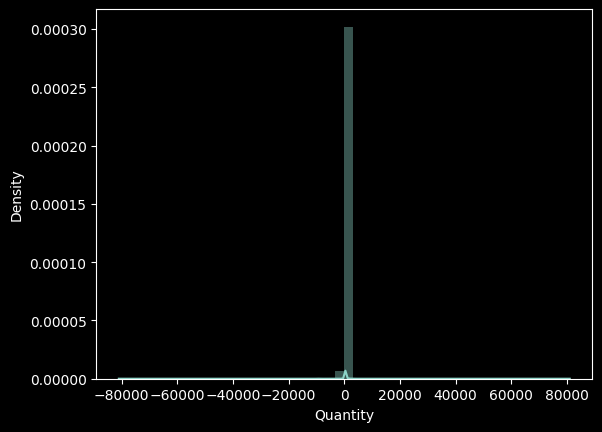

In [10]:
# distplot 활용 음수 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Quantity'])

In [13]:
# Uniprice 음수값 제거
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Quantity 음수값 제거
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
# 541,909 > 397,884
df.shape

(397884, 8)

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [20]:
# 이용 고객수(4,338명), 이용품목건수(5,167,812건), 이용 나라(37개국)
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4338, 5167812, 37)

In [21]:
# 인당 평균 구매건수(91건)
df.groupby('CustomerID')['InvoiceNo'].count().mean()

91.72060857538035

## Session2
## 지표 기획 및 데이터 추출

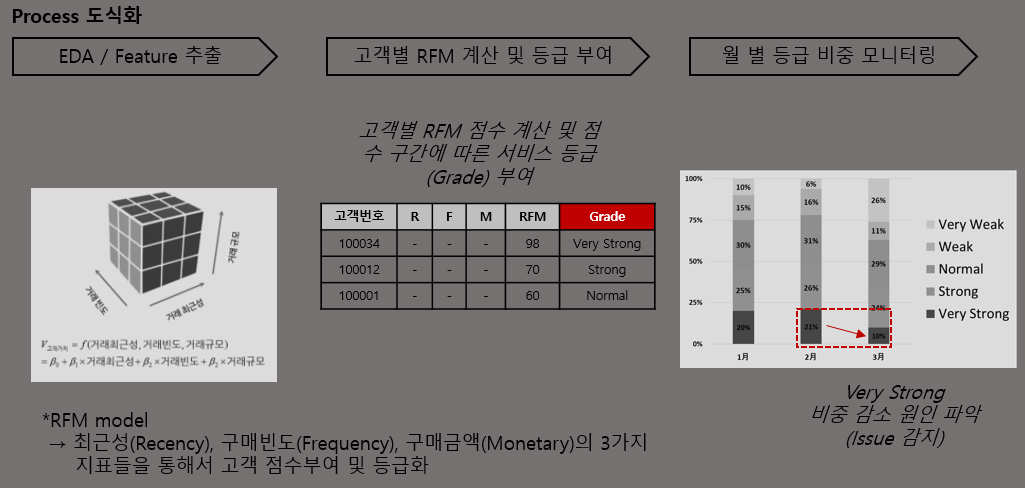

In [27]:
from re import A
from IPython.display import Image

Image( '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter18_이커머스 데이터 활용 지표 개발/img18.PNG')

### Recency(최근성)
---

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
# split 사용해서 송장 데이터에 날짜 데이터만 추출하기
df['InvoiceDate'].str.split(' ').str[0]

0         12/1/2010
1         12/1/2010
2         12/1/2010
3         12/1/2010
4         12/1/2010
            ...    
541904    12/9/2011
541905    12/9/2011
541906    12/9/2011
541907    12/9/2011
541908    12/9/2011
Name: InvoiceDate, Length: 397884, dtype: object

In [30]:
# Datetime index
import pandas as pd
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [31]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [33]:
# 고객ID별 가장 마지막 구매일
recency_df = df.groupby('CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID', 'LastPurchaseDate' ]
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [35]:
# 고객의 가장 마지막 구매일로부터 몇 일이 지났는지 계산하기 위함
recency_df['Recency']=recency_df['LastPurchaseDate'].apply(lambda x: (df['Date'].max() - x).days)
recency_df.drop(columns=['LastPurchaseDate'], inplace=True)

In [37]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


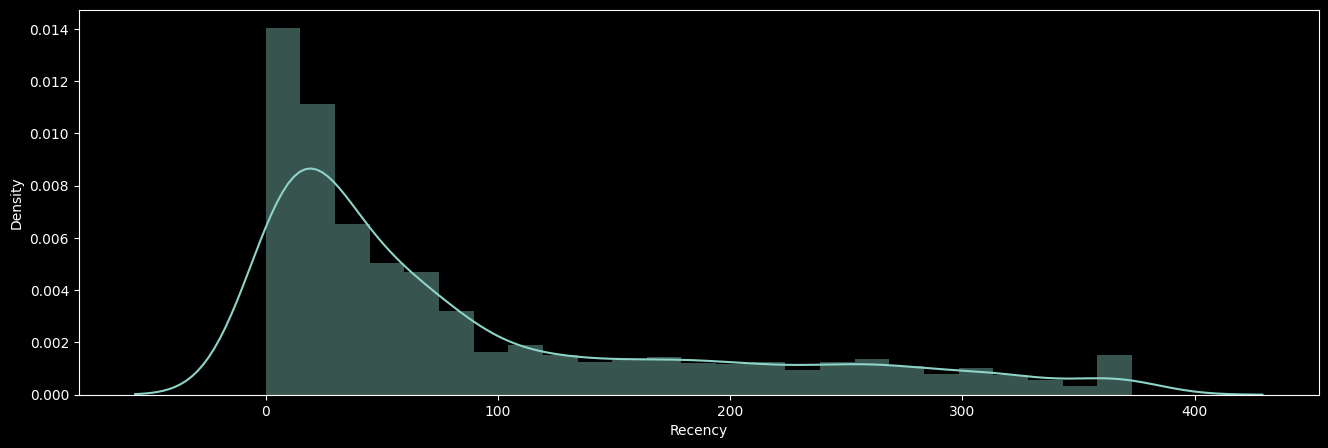

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(recency_df['Recency']);
plt.gcf().set_size_inches(16,5,3)

### Frequency(최빈성)
---

In [42]:
# Customer ID당 유니크한 Invoice를 1개의 주문 건으로 인식하여 얼마나 자주 구매하고 있는지를 파악
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep='first', inplace=True)
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns=['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


### Monetary(금액)
---

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [45]:
# 구매금액 = 구매개수 * 단가
df['Total_cost']=df['UnitPrice']*df['Quantity']
monetary_df = df.groupby('CustomerID', as_index=False)['Total_cost'].sum()
monetary_df.columns=['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [46]:
# Data merge

# recency and frequency
rf = recency_df.merge(frequency_df, how='left', on='CustomerID')

# monetary
rfm = rf.merge(monetary_df, how='left', on='CustomerID')

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## Session 3
## RFM활용 서비스 이용 수준 측정

### Scailing Data
---

In [51]:
# MinMax Scale= 최대값을 1, 최소값을 0으로 표준화하는 기법
from sklearn.preprocessing import  minmax_scale

# 최근성은 숫자가 작을수록, 즉 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음
rfm['Recency'] = minmax_scale(rfm['Recency'], axis=0, copy=True)
rfm['Recency']=1-rfm['Recency']

rfm['Frequency']=minmax_scale(rfm['Frequency'], axis=0, copy=True)

rfm['Monetary']=minmax_scale(rfm['Monetary'], axis=0, copy=True)

# Score
rfm['Score']=rfm['Recency']+rfm['Frequency']+rfm['Monetary']

# Score scaling 100 score
rfm

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,0.404130
1,12347.0,0.994638,0.028846,0.015368,1.038853
2,12348.0,0.798928,0.014423,0.006401,0.819751
3,12349.0,0.951743,0.000000,0.006259,0.958002
4,12350.0,0.168901,0.000000,0.001180,0.170081
...,...,...,...,...,...
4333,18280.0,0.257373,0.000000,0.000631,0.258004
4334,18281.0,0.517426,0.000000,0.000275,0.517701
4335,18282.0,0.981233,0.004808,0.000622,0.986663
4336,18283.0,0.991957,0.072115,0.007463,1.071535


In [55]:
# 100점을 곱해서 100점 만점으로 scaling
rfm['Score']=minmax_scale(rfm['Score'], axis=0, copy=True)*100
rfm['Score'] = round(rfm['Score'], 0)

In [56]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


### Grade(점수) 구간화
---

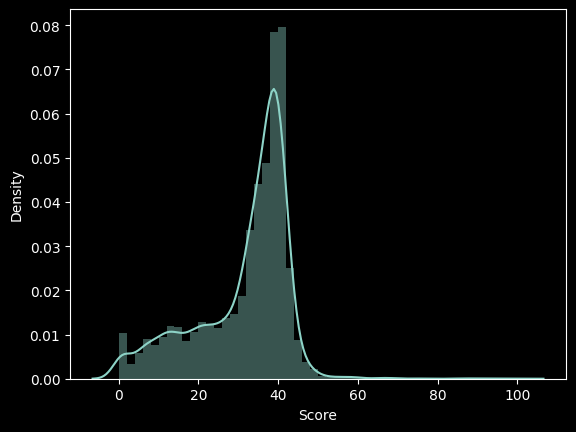

In [57]:
sns.distplot(rfm['Score']);

In [59]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


In [60]:
# 점수별로 고객의 등급을 부여
# 60점 이상 Very storong
# 40~60점 Storng
# 20~40점 Normal
# 10~20점 Weak
# 0~10점 Very Weak

rfm['Grade'] = rfm['Score'].apply(lambda x: '01.Very Strong' if x>=60 else
                                  ('02.Strong' if x >=40 else
                                   ('03.Normal' if x >= 20 else
                                    ('04.Weak' if x >=10 else '05.Very Weak'))))

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Score,Grade
0,12346.0,0.128686,0.000000,0.275443,16.0,04.Weak
1,12347.0,0.994638,0.028846,0.015368,42.0,02.Strong
2,12348.0,0.798928,0.014423,0.006401,33.0,03.Normal
3,12349.0,0.951743,0.000000,0.006259,39.0,03.Normal
4,12350.0,0.168901,0.000000,0.001180,7.0,05.Very Weak


In [61]:
# 기존 Data에 고객 등급 Data를 left join
df = pd.merge(df, rfm, how='left', on='CustomerID')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak


In [62]:
# 지표 기획에 앞서, 년월만 새로운 col로 정의(*월별 분석을 하기위한 준비)
df['Date_1'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,05.Very Weak,2010-12


### 지표 기획

#### 월 별 이용 고객 현황
---

In [64]:
# 월별 이용 고객 현황
df_cus = df.groupby('Date_1', as_index=False)['CustomerID'].nunique()
df_cus.tail()

,Date_1,CustomerID
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664
12,2011-12,615


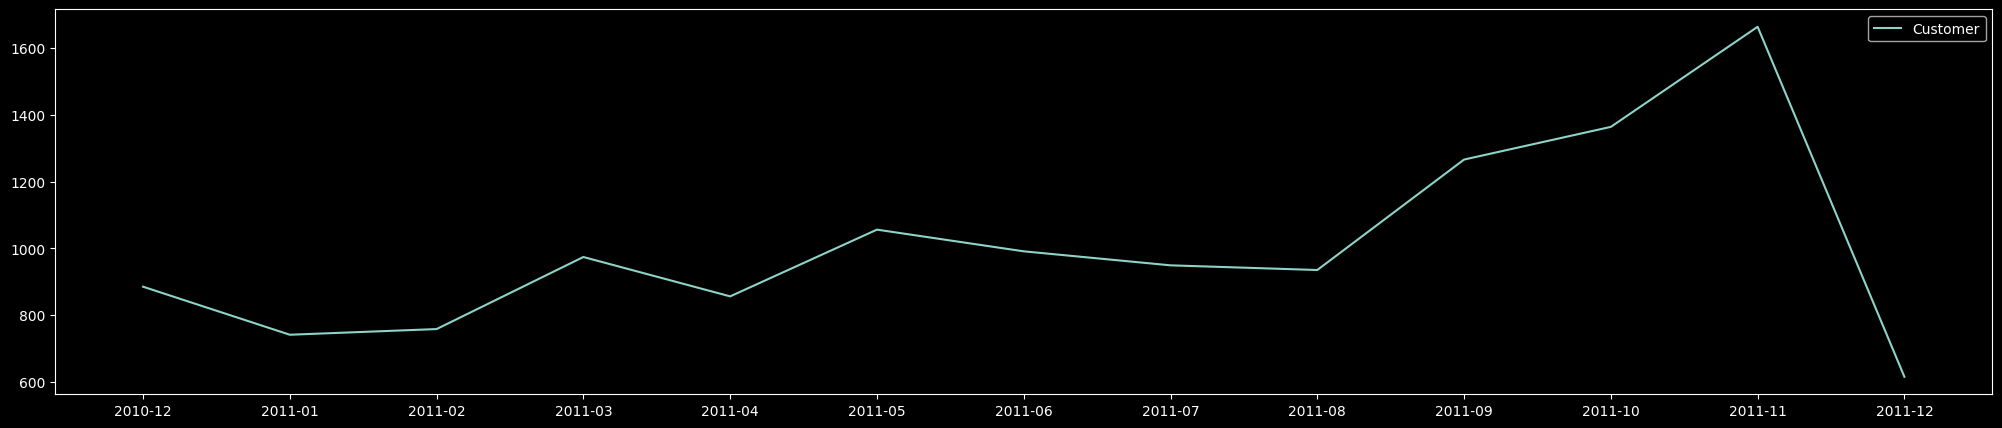

In [66]:
# 2010.12 런칭이후 사용자 수가 증가하고, 2011.11 peak를 달성했으나, 급하락
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(25, 5);


#### 월별 이용 건수
---

In [69]:
# 월별 이용 건수
df_cnt = df.groupby('Date_1', as_index=False)['InvoiceNo'].nunique()
df_cnt.tail()

,Date_1,InvoiceNo
8,2011-08,1280
9,2011-09,1755
10,2011-10,1929
11,2011-11,2657
12,2011-12,778


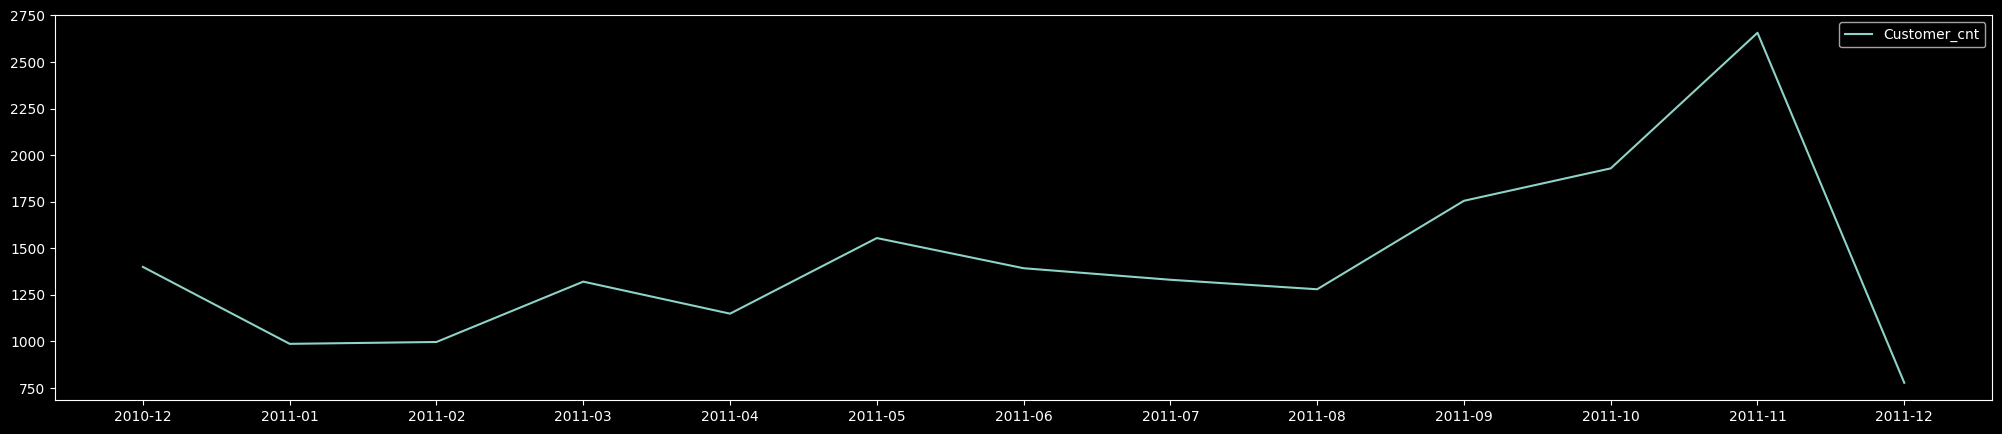

In [70]:
# 월별 이용 고객수와 비슷함.
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt');
plt.legend();
plt.gcf().set_size_inches(25, 5);


#### 월 별 이용 국가
---

In [71]:
df['Country'].nunique()

37

In [72]:
# 월별 이용 국가
df_country = df.groupby('Date_1', as_index=False)['Country'].nunique()
df_country.tail()

,Date_1,Country
8,2011-08,23
9,2011-09,20
10,2011-10,25
11,2011-11,21
12,2011-12,18


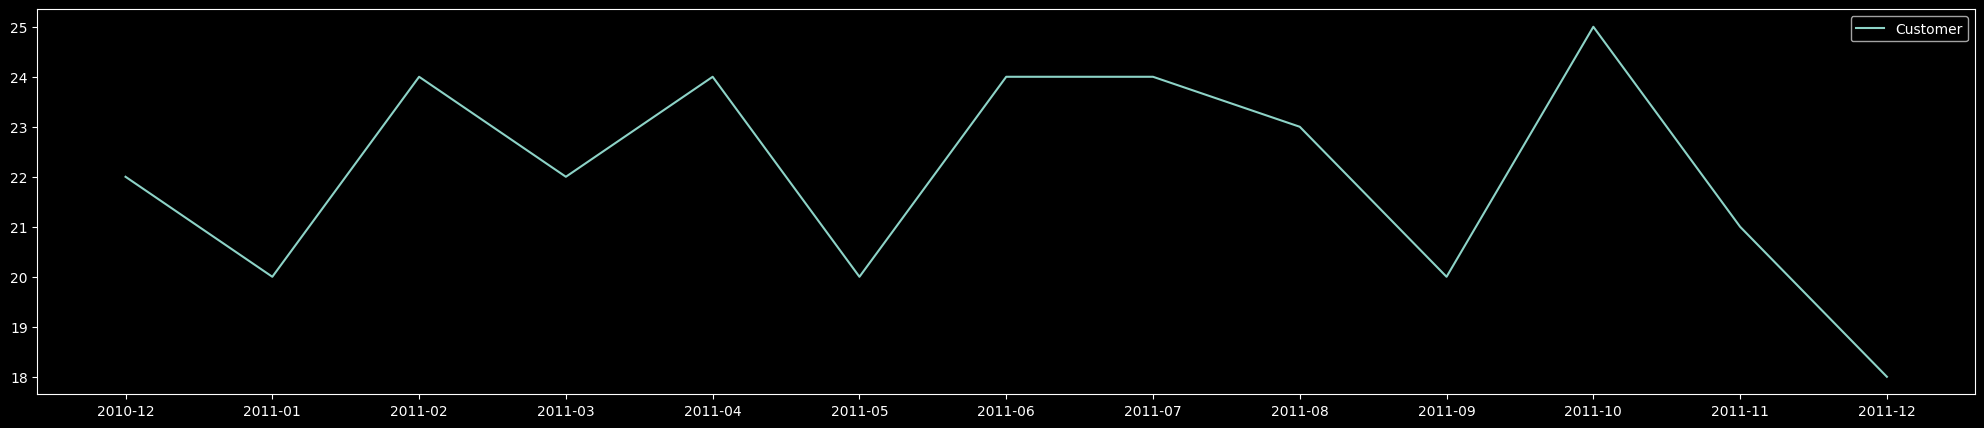

In [73]:
# 2010.12 런칭이후 사용자 수가 증가하고, 2011.11 peak를 달성했으나, 급하락
plt.plot(df_country['Date_1'], df_country['Country'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(25, 5);


In [74]:
# 가장 충성도 높은 나라
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Australia,57
Portugal,57


#### 월 별 Grade 이용 비중
---

In [76]:
df_grade = df.groupby(['Date_1', 'Grade'], as_index=False)['CustomerID'].nunique()
df_grade.tail()

,Date_1,Grade,CustomerID
42,2011-11,01.Very Strong,12
43,2011-11,02.Strong,811
44,2011-11,03.Normal,841
45,2011-12,01.Very Strong,10
46,2011-12,02.Strong,605


In [77]:
df_pivot = pd.pivot_table(df_grade,            # 피벗할 데이터프레임
                      index = 'Date_1',        # 행 위치에 들어갈 열
                      columns = 'Grade',       # 열 위치에 들어갈 열
                      values = 'CustomerID')   # 데이터로 사용할 열

df_pivot.fillna(0, inplace=True)
df_pivot['total'] = df_pivot['01.Very Strong'] + df_pivot['02.Strong'] + df_pivot['03.Normal'] + df_pivot['04.Weak'] + df_pivot['05.Very Weak']


df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.448588,0.328814,0.047458,0.162712
2011-01,0.014845,0.450742,0.349528,0.045884,0.139001
2011-02,0.014512,0.419525,0.377309,0.056728,0.131926
2011-03,0.012320,0.401437,0.388090,0.198152,0.000000
2011-04,0.014019,0.420561,0.394860,0.170561,0.000000
2011-05,0.012311,0.425189,0.428977,0.133523,0.000000
2011-06,0.012109,0.427851,0.560040,0.000000,0.000000
2011-07,0.012645,0.443625,0.543730,0.000000,0.000000
2011-08,0.012834,0.453476,0.533690,0.000000,0.000000


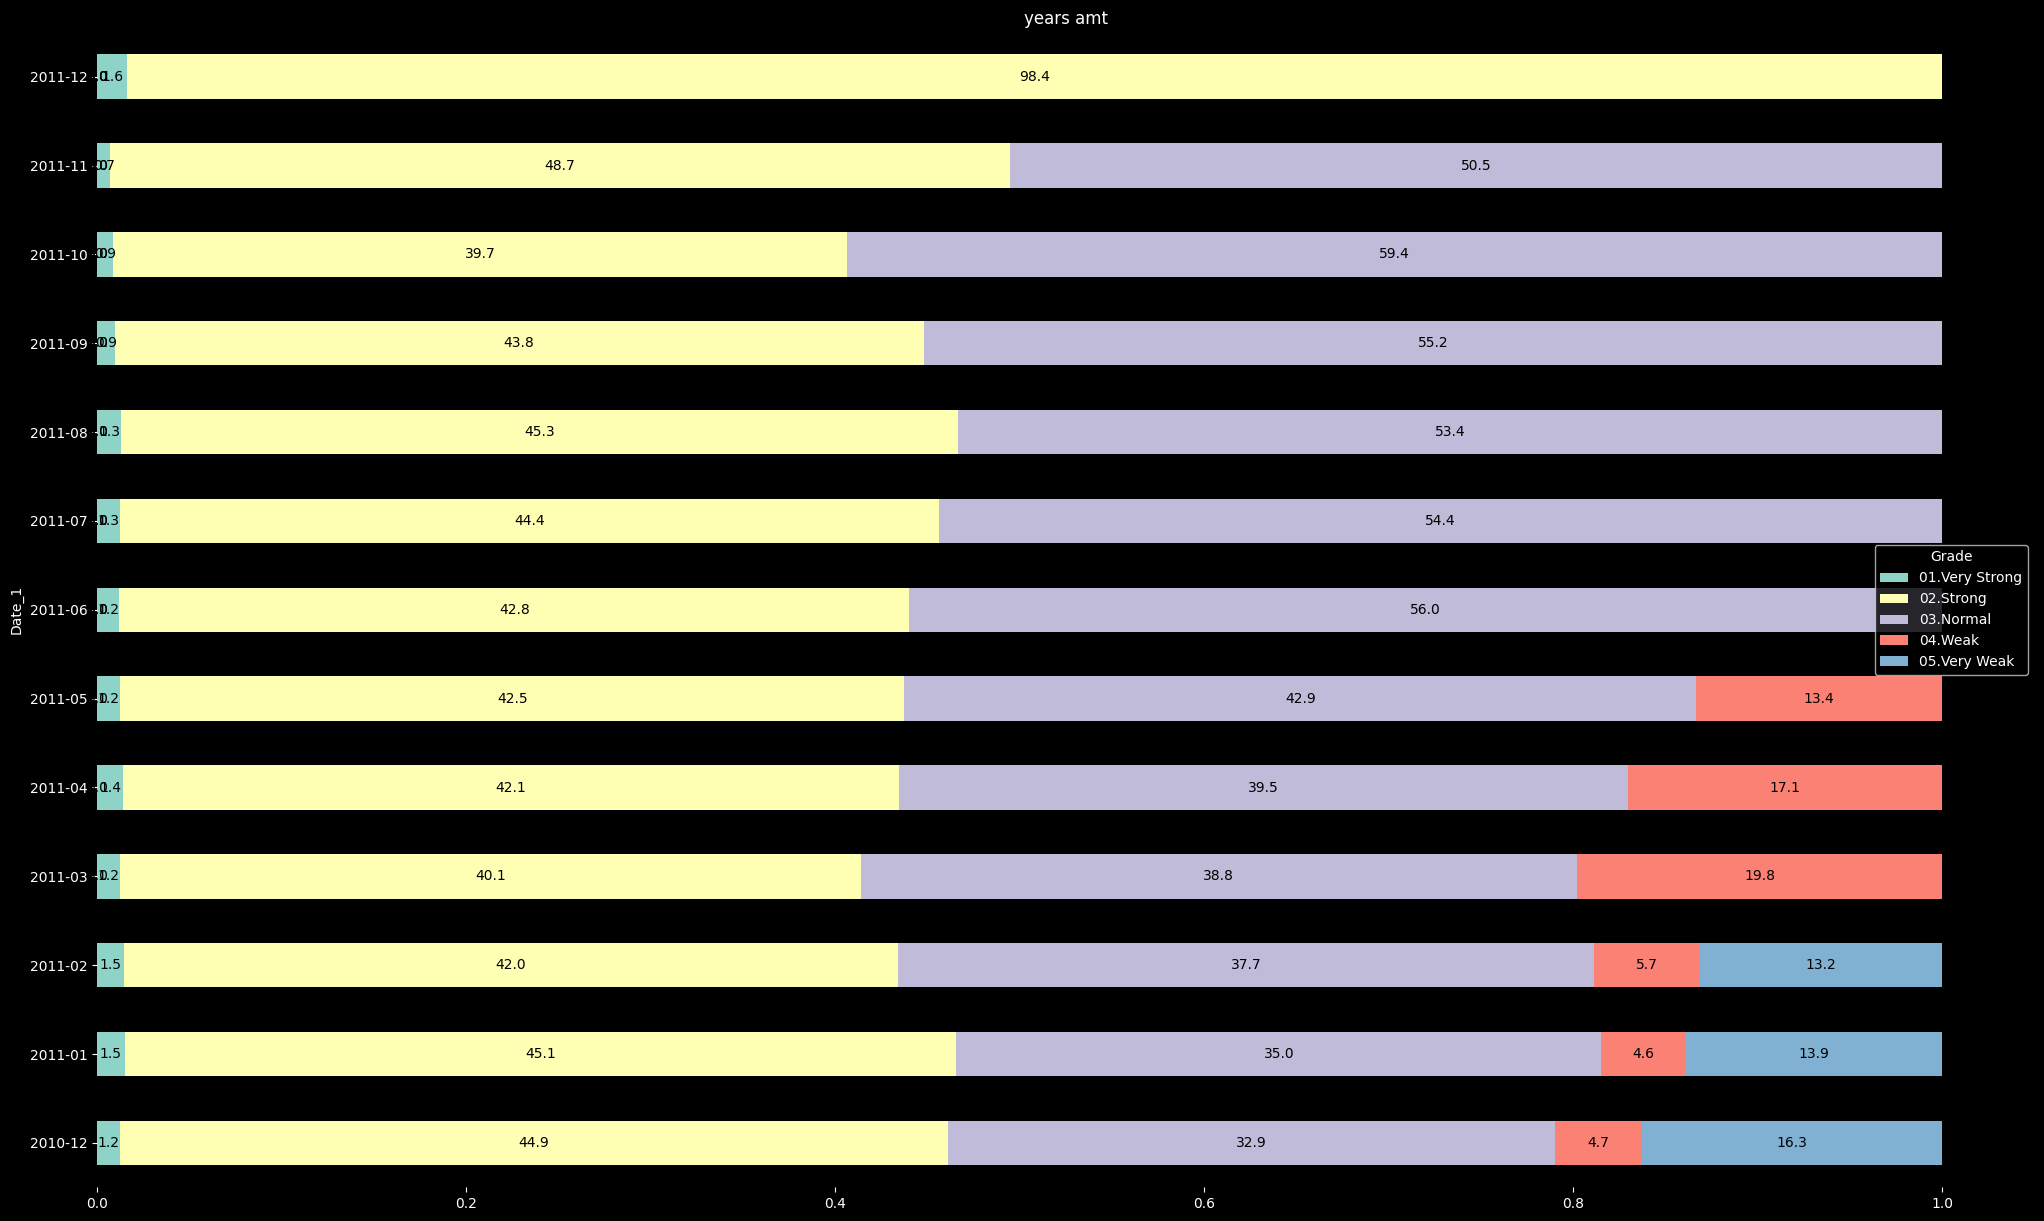

In [78]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

plt.box(False)
plt.gcf().set_size_inches(25, 15)
plt.show()